# Time Series Analysis of Hipparcos

This time series analysis of Hipparcos data was an attempt at measuring the rotation period of the M-type star GJ 3942.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle
import lightkurve as lk

## Rotation Period
Our rotation period used is that of a best-fit frequency, while the recorded rotation period is 16.3 days in <a href="https://ui.adsabs.harvard.edu/abs/2017A%26A...608A..63P/abstract">Perger et al. (2021)</a>. Within the TESS time series analysis, a best-fit frequency of 15.7 was found and used. The fonts and sizes for plots are also stated here.

In [4]:
# Input Signal (Best-Fit)
rp = 15.7

# Fonts and Sizes
figsize = (9, 5)
title_font = 18
label_font = 14
tick_font = 12

## Hipparcos Dataset

We define a variable to contain the data from Hipparcos. The file path would need to be adjusted based on where you have the file.

In [67]:
data = "/Users/andrewandmatthewfonseca/Downloads/UID_0079126_PLC_001.tbl.txt"
SuperWASP_data = "/Users/andrewandmatthewfonseca/Downloads/plot.tbl"
y = pd.read_table(data, comment='#', delim_whitespace=True)
colnames = ['BJD', 'Magnitude']
#test_data = pd.read_csv(data, comment="#", header=0, names=colnames, delim_whitespace=True, skiprows=3)
print(y)

              BJD  Magnitude  Magnitude_Uncertainty  Data_Quality_Flag  \
0    2.447895e+06    10.2286                  0.022                  1   
1    2.447895e+06    10.2396                  0.023                  1   
2    2.447947e+06    10.2634                  0.024                  1   
3    2.447947e+06    10.2482                  0.022                  1   
4    2.447947e+06    10.2523                  0.025                  0   
..            ...        ...                    ...                ...   
111  2.448950e+06    10.2535                  0.026                  0   
112  2.448950e+06    10.2699                  0.033                  0   
113  2.449055e+06    10.2837                  0.033                  2   
114  2.449055e+06    10.2951                  0.021                  0   
115  2.449055e+06    10.2724                  0.030                  0   

     Accepted  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  

## Scatter Plot and Sigma Clipping

With this scatter plot, we can see the distribution of the sigma clipped data points by 3$\sigma$. We also catch the unclipped Hipparcos data to use for later down the notebook.

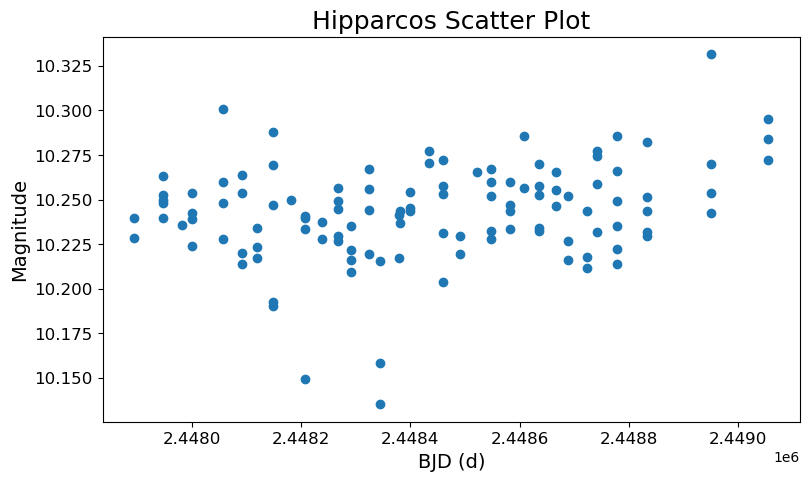

In [68]:
# Loading data
bjd, mag = np.loadtxt(data, skiprows=124, unpack=True, usecols=[0, 1])
std_dev = np.std(mag)

# Sigma Clipping
good_data = np.where(np.abs(mag - np.mean(mag)) < 3 * std_dev)[0]
bjd = bjd[good_data]
mag = mag[good_data]

# Plotting
plt.figure(figsize=figsize)
plt.scatter(bjd, mag)
plt.title('Hipparcos Scatter Plot', fontsize=title_font)
plt.xlabel('BJD (d)', fontsize=label_font)
plt.ylabel('Magnitude', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()
#len(bjd)

# Unclipped Hipparcos Data
bjd_full, mag_full = np.loadtxt(data, skiprows=124, unpack=True, usecols=[0, 1])

## Histrogram

We take the sigma clipped data and create a histogram of the time steps. These time steps are in log base 10.

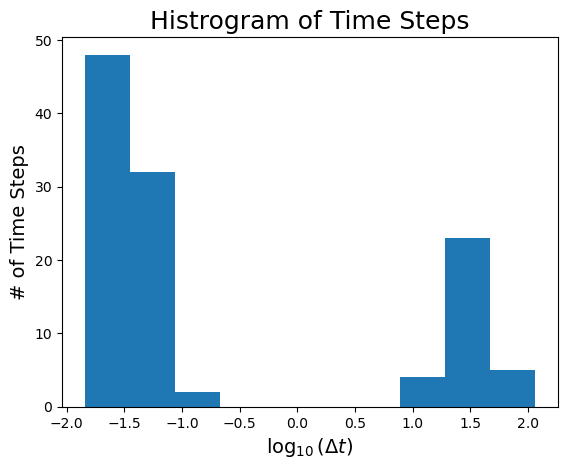

In [69]:
# Delta t 
dt = np.diff(bjd)

# Plotting
#plt.figure(figsize=figsize)
plt.hist(np.log10(dt))
plt.title('Histrogram of Time Steps', fontsize=title_font)
plt.xlabel(r"$\log_{10}(\Delta t)$", fontsize=label_font)
plt.ylabel('# of Time Steps', fontsize=label_font)
plt.show()

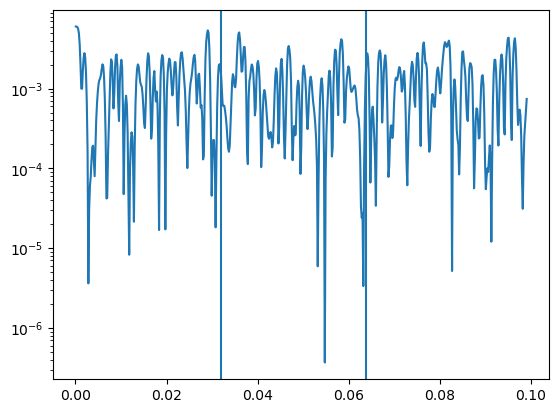

In [70]:
# Lomb-Scargle of Hipparcos data (clipped data) #spectral window # plot a
freq, power = LombScargle(bjd, mag, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(freq, power)
plt.axvline(1/rp)
plt.axvline((1/rp)/2)

(0.1, 100)

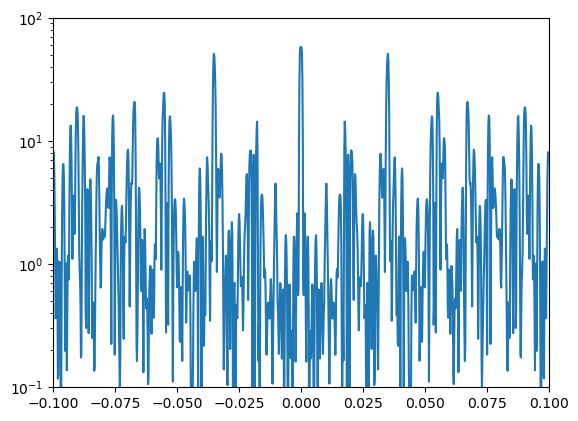

In [71]:
# Lomb-Scargle (full data) of Hipparcos
plt.figure()
freq, specwin = LombScargle(bjd_full - bjd_full[0], np.ones(len(bjd_full)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.1, 0.1)
plt.ylim(1e-1, 100)

(-0.1, 0.1)

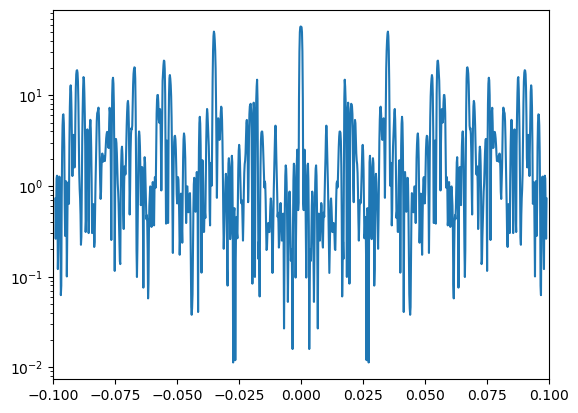

In [72]:
# Lomb-Scargle (clipped data) of Hipparcos
plt.figure()
freq, specwin = LombScargle(bjd - bjd[0], np.ones(len(bjd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.1, 0.1)
# 'any times there are np.ones(len(bjd)), it is a spectral window'

(0.0, 0.25)

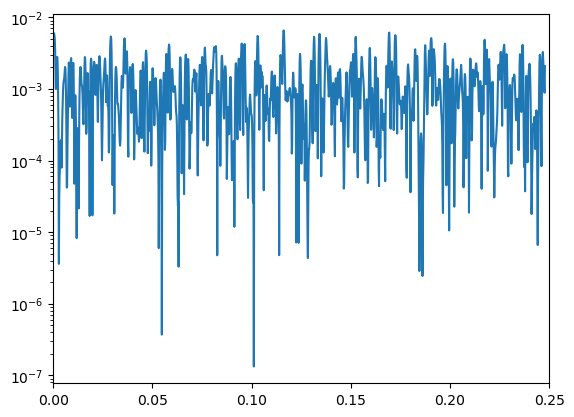

In [73]:
# Periodogram of Hipparcos data # 'higher frequencies compared to spectral window of plot (a) above'
plt.figure()
cut_frequency, cut_power = LombScargle(bjd - bjd[0], mag, normalization="psd").autopower()
plt.semilogy(cut_frequency, cut_power)
plt.xlim(0, 0.25)

(-0.1, 0.1)

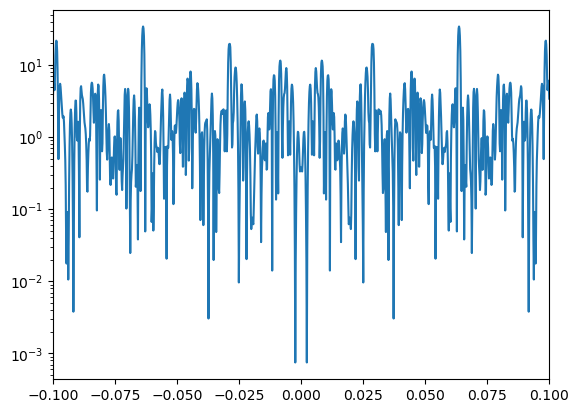

In [74]:
# Pesudo-window (unclipped) of Hipparcos
plt.figure()
freq, specwin = LombScargle(bjd_full - bjd_full[0], np.sin(2*np.pi*(bjd_full-bjd_full[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.1, 0.1)
# 'any time there is sin(...), it is a pseudo-window'

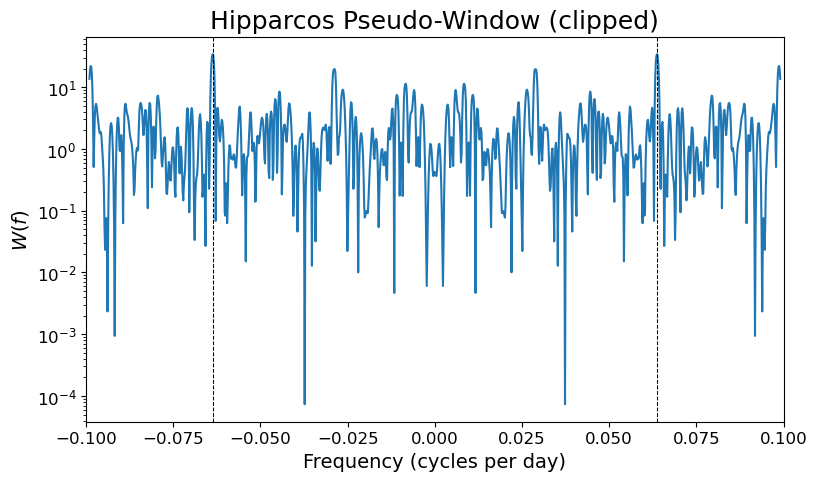

In [75]:
# Pseudo-Window for clipped data
plt.figure(figsize=(9, 5))
plt.title("Hipparcos Pseudo-Window (clipped)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
freq, specwin = LombScargle(bjd - bjd[0], np.sin(2*np.pi*(bjd-bjd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.xlim(-0.1, 0.1)
plt.axvline(1/rp, linestyle='--', linewidth=0.75, color='black')
plt.axvline(-(1/rp), linestyle='--', linewidth=0.75, color='black')

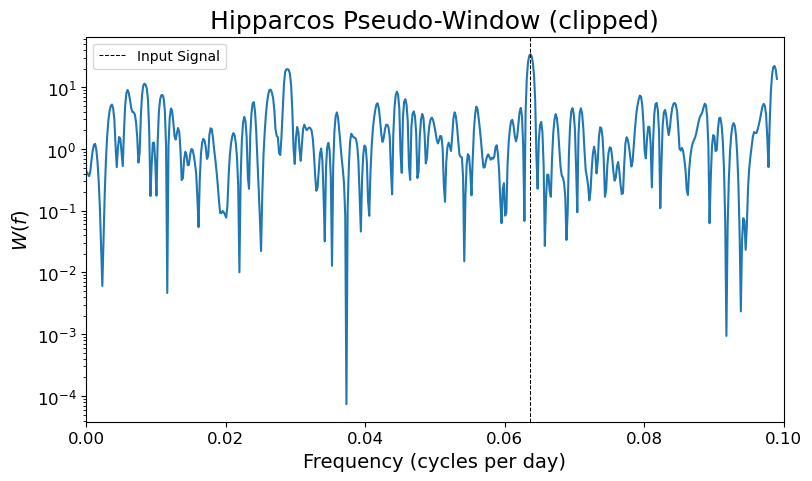

In [76]:
# Selected Positive frequencies only

# Pseudo-Window for clipped data
plt.figure(figsize=(9, 5))
plt.title("Hipparcos Pseudo-Window (clipped)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
freq, specwin = LombScargle(bjd - bjd[0], np.sin(2*np.pi*(bjd-bjd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Select only positive frequencies
positive_freq = freq[freq > 0]
positive_specwin = specwin[freq > 0]

plt.semilogy(positive_freq, positive_specwin)
plt.xlim(0, 0.1)
plt.axvline(1/rp, linestyle='--', linewidth=0.75, color='black', label='Input Signal')
#plt.axvline(-(1/rp), linestyle='--', linewidth=0.75, color='black')
plt.legend()

In [77]:
# Run speactral and psudeo window of Hipparcos data
# find wave length coverage of the filters of test filter (MAST), SuperWASP filter, and Hipparcos (Hp filter)
# add shaded resoulution to hipparcos
# for later, detrend Hipparcos.
# look at observation period for TESS, Hipparcos, and SuperWASP.

## Sources

Filter:
 - http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?id=Hipparcos/Hipparcos.Hp&&mode=browse&gname=Hipparcos&gname2=Hipparcos#filter